# Lista 2 - Exercício 2

Gere um conjunto $X$ com $N=1000$, seguindo:

$$
\begin{align*}
p(x) &= \sum_{j=1}^{3}P_j p(x|j) & m_1 = [1, 1]^T \\
S_1 &= 0.1I, S_2 = 0.2I, S_3 = 0.3I & m_2 = [3, 3]^T \\
P_1 &= 0.4, P_2 = 0.4, P_3 = 0.2 & m_3 = [2, 6]^T
\end{align*}
$$

a) Aplique o algoritmo EM para definir os parâmetros do conjunto de dados acima, assumindo que esses parâmetros são previamente desconhecidos. Utilize:

$$
\begin{gather*}
J = 3 \\
m_{1,ini} = [0, 2]^T, m_{2,ini} = [5, 2]^T, m_{3,ini} = [5, 5]^T \\
S_{1,ini} = 0.15I, S_{2,ini} = 0.27I, S_{3,ini} = 0.4I \\
P_{1,ini} = P_{2,ini} = P_{3,ini} = 1/3
\end{gather*}
$$

In [1]:
import numpy as np
from numpy.random import multivariate_normal
import scipy
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

N = 1000

mu1, mu2, mu3 = [1, 1], [3, 3], [2, 6]
s1, s2, s3 = 0.1 * np.identity(2), 0.2 * np.identity(2), 0.3 * np.identity(2)

x1, x2, x3 = multivariate_normal(mu1, s1, N), multivariate_normal(mu2, s2, N), multivariate_normal(mu3, s3, N)

X = np.vstack([x1, x2, x3])

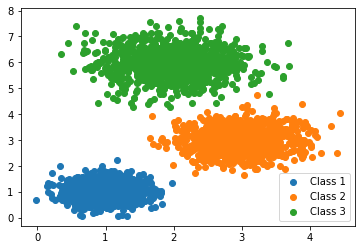

In [2]:
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x3[:, 1])
plt.legend(['Class 1', 'Class 2', 'Class 3'])
plt.show()

In [3]:
# Plota o estado final do EM
def plot(mu, S):
    xx = np.linspace(-1, 5)
    yy = np.linspace(-1, 9)
    XX, YY = np.meshgrid(xx, yy)

    pos = np.empty(XX.shape + (2,))
    pos[:, :, 0] = XX; pos[:, :, 1] = YY

    plt.scatter(x1[:, 0], x1[:, 1])
    plt.scatter(x2[:, 0], x2[:, 1])
    plt.scatter(x3[:, 0], x3[:, 1])

    for (m, s) in zip(mu, S):
        z = scipy.stats.multivariate_normal(m, s)
        plt.contour(XX, YY, z.pdf(pos), alpha=0.5)

    plt.show()

Predicted means:


array([[1.01047828, 1.01796628],
       [2.99495541, 2.99763237],
       [1.97750246, 5.96952753]])

Predicted covariance:


array([[[ 9.23747691e-02,  2.44996967e-04],
        [ 2.44996967e-04,  1.02860029e-01]],

       [[ 2.03107546e-01,  7.30513608e-03],
        [ 7.30513608e-03,  1.99058185e-01]],

       [[ 2.92022717e-01, -1.00555969e-02],
        [-1.00555969e-02,  3.10680855e-01]]])

Predicted weights:


array([0.33331418, 0.33303291, 0.3336529 ])

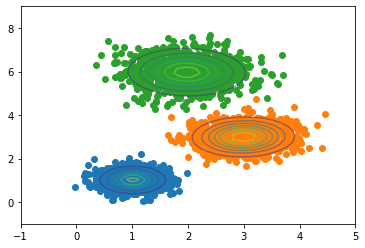

In [4]:
J = 3
mu_init = [[0, 2], [5, 2], [5, 5]]
s_init = [0.15 * np.identity(2), 0.27 * np.identity(2), 0.4 * np.identity(2)]
p_init = [np.linalg.inv(s) for s in s_init]
w_init = [1/3] * 3

em = GaussianMixture(n_components=J, covariance_type='full', weights_init=w_init, means_init=mu_init, precisions_init=p_init, random_state=42)
em.fit(X)

mu_em = em.means_
s_em = np.array([np.linalg.inv(s) for s in em.precisions_])
print("Predicted means:")
display(mu_em)
print("Predicted covariance:")
display(s_em)
print("Predicted weights:")
display(em.weights_)

plot(mu_em, s_em)

b) Altere os parâmetros iniciais e verifique o impacto no resultado final. Compare também, os valores obtidos com os valores verdadeiros das PDFs.

Apesar de a convergência do método ter demorado mais, mesmo com uma inicialização mais distante dos valores reais (porém com um valor adequado de $J$), o método ainda foi capaz de se aproximar do resultado esperado de maneira satisfatória, com exceção dos pesos das classes que permaneceu próximo do valor inicial nos dois casos. Entretanto, o método se perdeu em casos onde os pontos iniciais estava muito distantes.

Para valores de $J$ diferentes do real, o método apresenta um comportamento interessante. Informando um valor de $J$ menor, o método tende a ajustar as componentes para múltiplas distribuições diferentes. Para valores maiores, o método ajusta múltiplas componentes para uma mesma distribuição.

Predicted means:


array([[1.97747122, 5.9696231 ],
       [1.01047805, 1.01796605],
       [2.99492785, 2.99770671]])

Predicted covariance:


array([[[ 2.92001134e-01, -1.00104141e-02],
        [-1.00104141e-02,  3.10534078e-01]],

       [[ 9.23745963e-02,  2.44887379e-04],
        [ 2.44887379e-04,  1.02859859e-01]],

       [[ 2.03130596e-01,  7.27633346e-03],
        [ 7.27633346e-03,  1.99149997e-01]]])

Predicted weights:


array([0.33363379, 0.33331406, 0.33305214])

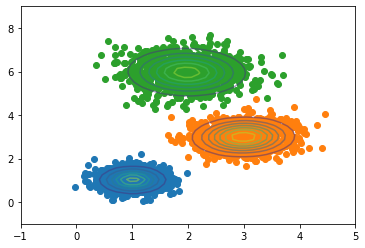

In [5]:
# Parâmetros iniciais arbitrários, porém relativamente próximos do real
J = 3
mu_init = [[7, 8], [0, 2.5], [4.9, 6.5]]
s_init = [2.15 * np.identity(2), 1.27 * np.identity(2), 7 * np.identity(2)]
p_init = [np.linalg.inv(s) for s in s_init]
w_init = [0.2, 0.5, 0.3] 

em = GaussianMixture(n_components=J, covariance_type='full', weights_init=w_init, means_init=mu_init, precisions_init=p_init, random_state=42)
em.fit(X)

mu_em = em.means_
s_em = np.array([np.linalg.inv(s) for s in em.precisions_])
print("Predicted means:")
display(mu_em)
print("Predicted covariance:")
display(s_em)
print("Predicted weights:")
display(em.weights_) 

plot(mu_em, s_em)

Predicted means:


array([[0.        , 0.        ],
       [1.99402491, 3.32936304],
       [0.        , 0.        ]])

Predicted covariance:


array([[[1.00000000e-06, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e-06]],

       [[8.52045736e-01, 6.31770087e-01],
        [6.31770087e-01, 4.34735229e+00]],

       [[1.00000000e-06, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e-06]]])

Predicted weights:


array([7.40148683e-19, 1.00000000e+00, 7.40148683e-19])

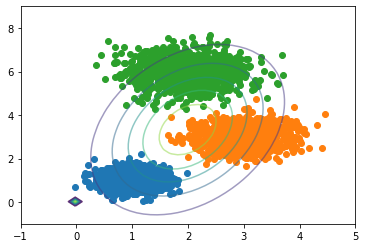

In [6]:
# Parâmetros iniciais arbitrários e distantes do real
J = 3
mu_init = [[14, 35], [-2, 8], [21.9, 31]]
s_init = [4.15 * np.identity(2), 2.27 * np.identity(2), 7.4 * np.identity(2)]
p_init = [np.linalg.inv(s) for s in s_init]
w_init = [0.1, 0.1, 0.8] 

em = GaussianMixture(n_components=J, covariance_type='full', weights_init=w_init, means_init=mu_init, precisions_init=p_init, random_state=42)
em.fit(X)

mu_em = em.means_
s_em = np.array([np.linalg.inv(s) for s in em.precisions_])
print("Predicted means:")
display(mu_em)
print("Predicted covariance:")
display(s_em)
print("Predicted weights:")
display(em.weights_) 

plot(mu_em, s_em)

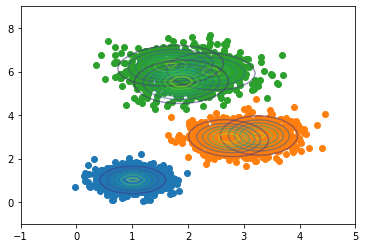

In [7]:
J = 6

em = GaussianMixture(n_components=J)
em.fit(X)

mu_em = em.means_
s_em = np.array([np.linalg.inv(s) for s in em.precisions_])
plot(mu_em, s_em)

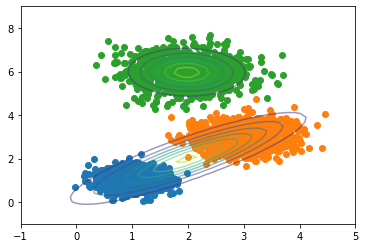

In [8]:
J = 2

em = GaussianMixture(n_components=J)
em.fit(X)

mu_em = em.means_
s_em = np.array([np.linalg.inv(s) for s in em.precisions_])
plot(mu_em, s_em)